In this notebook, we will use pandas to analyze us baby names. In particular, we will explore in detail of popular names, names that rises and dies (fades), names that are unisex (names that an be for both boys and girls) and finally we will see number of new names introduced as the function years and we will use this number to predict the number of new babies name added every year.

In [1]:
# importing basic python packages.

from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyflux as pf # arima model package
from pandas.tools.plotting import autocorrelation_plot
import warnings; warnings.simplefilter('ignore')

In [2]:
# plot setting.

%matplotlib inline
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
#loading the csv baby name data to pandas dataframe
df=pd.read_csv("~/Downloads/us-baby-names/StateNames.csv")
df.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


### Basic data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647426 entries, 0 to 5647425
Data columns (total 6 columns):
Id        int64
Name      object
Year      int64
Gender    object
State     object
Count     int64
dtypes: int64(3), object(3)
memory usage: 258.5+ MB


### Basic Analysis 

Counting the number of new babies grouped by year and states. 

In [5]:
New_baby=df.groupby(['Year','State'])['Count'].sum().reset_index()
New_baby.head()

,Year,State,Count
0,1910,AK,115
1,1910,AL,19694
2,1910,AR,11042
3,1910,AZ,1074
4,1910,CA,9164


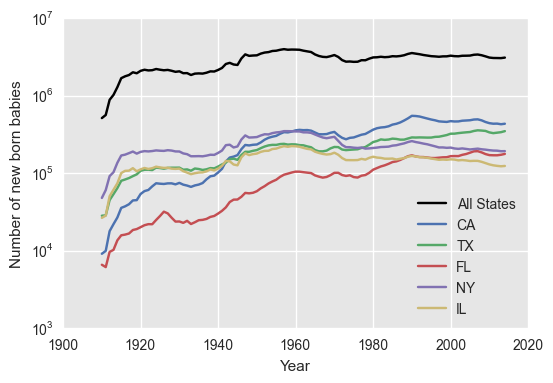

In [6]:
plt.plot(df.groupby(['Year'])['Count'].sum().reset_index()['Year'],
         df.groupby(['Year'])['Count'].sum().reset_index()['Count'],color='black',label='All States')
for st in ['CA','TX','FL','NY','IL']:
    #df.groupby(['Year'])['Count'].sum().reset_index()['Count'].plot(color='black',label='all states')
    plt.plot(New_baby[New_baby.State==st].Year, New_baby[New_baby.State==st]['Count'],label=st)
    plt.legend(loc='best')
    plt.yscale('log')
plt.xlabel('Year');plt.ylabel("Number of new born babies");

Not surprising that the total number of new babies’ curve is shaped by these five highly populated states.
However, one interesting things from this plot is that the number of new babies for NY is higher until around 1960 and then stabilizes if not decreasing. This might be the fact that rising family in NY is getting difficult for many reasons. A similar pattern is shown for IL but for the other states the number new babies is increasing as function of years.

In [7]:
df.drop(['Id','State'], axis=1, inplace=True) # not using these two columns any more
df.head()

,Name,Year,Gender,Count
0,Mary,1910,F,14
1,Annie,1910,F,12
2,Anna,1910,F,10
3,Margaret,1910,F,8
4,Helen,1910,F,7


Grouping the number of new babies and counting accross all states.

In [8]:
df=pd.DataFrame(df.groupby(['Name','Year','Gender'])['Count'].sum()).reset_index()
df.head()

,Name,Year,Gender,Count
0,Aaban,2013,M,6
1,Aaban,2014,M,6
2,Aadan,2008,M,12
3,Aadan,2009,M,6
4,Aadan,2014,M,5


In [9]:
df_indexed = df.set_index(['Gender','Name','Year']).sort_index() # making Gender Name and Year as multi-index

In [10]:
df_indexed.head()

Count
Gender Name   Year       
F      Aadhya 2007      5
              2009      6
              2011     20
              2012     66
              2013    135

In [11]:
df_indexed.loc['F','Mary'].head()

,Count
Year,
1910,22848
1911,24390
1912,32303
1913,36641
1914,45344


Here I define a function that accept sex and name to plot the number of new babies with that name funtion of year.

In [12]:
def plot_names(sex,name):
    name_data = df_indexed.loc[sex,name]
    
    plt.plot(name_data.index,name_data.values)

Plotting some of the top three boys names of the 1980 and late 2017.

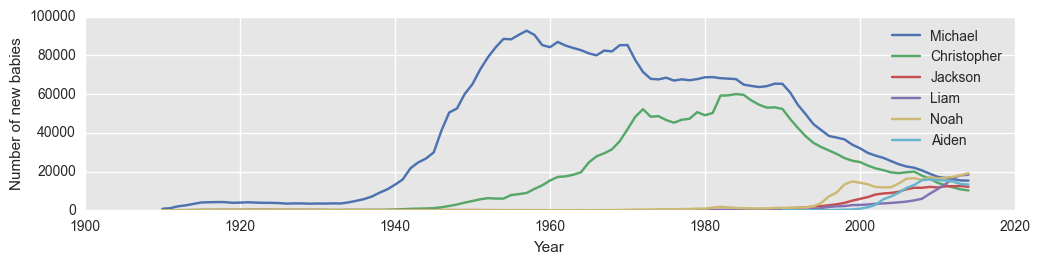

In [13]:
plt.figure(figsize=(12,2.5))

names = ['Michael','Christopher','Jackson','Liam','Noah','Aiden']

for name in names:
    plot_names('M',name)

plt.legend(names,loc='best');
plt.xlabel("Year");plt.ylabel("Number of new babies");

Plotting some of the top three girls names of the 1980 and late 2017.

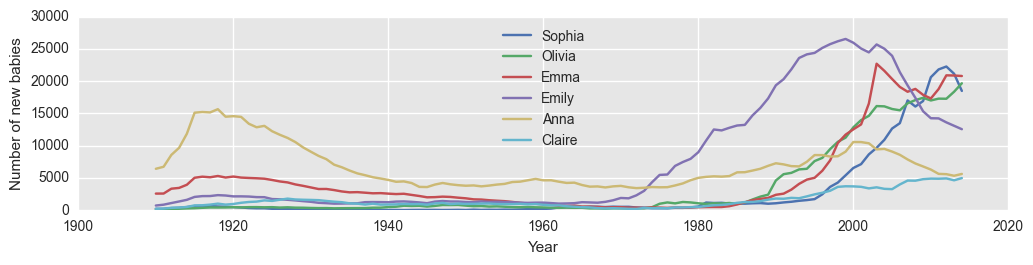

In [14]:
plt.figure(figsize=(12,2.5))

names = ['Sophia','Olivia','Emma','Emily','Anna','Claire']

for name in names:
    plot_names('F',name)

plt.legend(names,loc='best');
plt.xlabel("Year");plt.ylabel("Number of new babies");

### Name variant
A name variant is an alternative of a name that is considered to be equivalent to that name, but which differs from the name with a few spellings (e.g.,, Geoff and Jeff). In other words, the two names are considered somehow equivalent and can be substituted for the other in some context. 

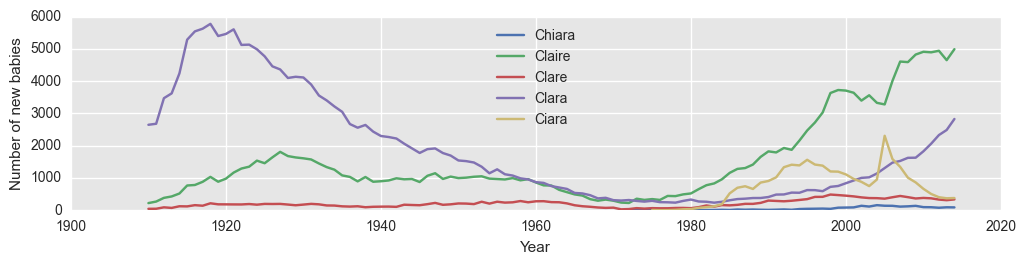

In [15]:
plt.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara'] # name variants
for name in names:
    plot_names('F',name)

plt.legend(names,loc='best');
plt.xlabel("Year");plt.ylabel("Number of new babies");

Clara variant was dominant until around 1960 but Claire is now dominant variant name. We can plot this plot with stackplot this is more beautiful.

In [16]:
df_indexed.loc['F'].loc[names].head()

Count
Name   Year       
Chiara 1972      6
       1974      5
       1975     14
       1976     12
       1977     12

In [17]:
df_indexed.loc['F'].loc[names].unstack(level=0).head()

Count                            
Name Chiara Ciara Claire   Clara  Clare
Year                                   
1910    NaN   NaN  224.0  2649.0   47.0
1911    NaN   NaN  272.0  2681.0   49.0
1912    NaN   NaN  386.0  3473.0   93.0
1913    NaN   NaN  430.0  3622.0   75.0
1914    NaN   NaN  521.0  4240.0  126.0

In [18]:
df_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

Count                            
Name Chiara Ciara Claire   Clara  Clare
Year                                   
1910    0.0   0.0  224.0  2649.0   47.0
1911    0.0   0.0  272.0  2681.0   49.0
1912    0.0   0.0  386.0  3473.0   93.0
1913    0.0   0.0  430.0  3622.0   75.0
1914    0.0   0.0  521.0  4240.0  126.0

In [19]:
variants = df_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

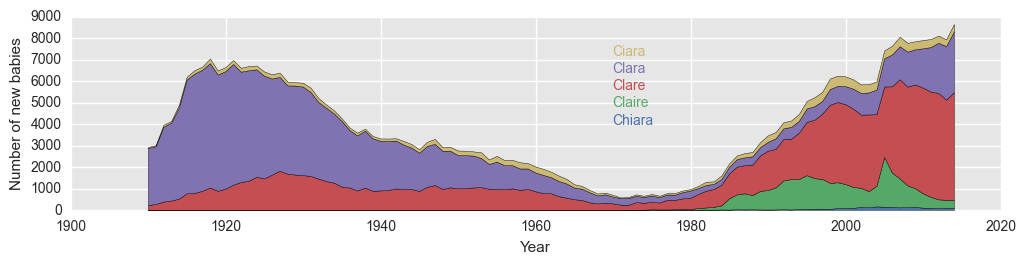

In [20]:
plt.figure(figsize=(12,2.5))

palette = sns.color_palette()
plt.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    plt.text(1970,4000 + 800*i,name,color=palette[i]);
plt.xlabel("Year");plt.ylabel("Number of new babies");

### Top ten popular boys and girls names from year 2005 to 2014

In [21]:
df_indexed.loc['M',:,2012].sort_values('Count',ascending=False).head()

Count
Gender Name    Year       
M      Jacob   2012  19030
       Mason   2012  18943
       Ethan   2012  17635
       Noah    2012  17302
       William 2012  16844

In [22]:
pop_name_2012 = df_indexed.loc['M',:,2012].sort_values('Count',ascending=False).head()

In [23]:
pop_name_2012.reset_index().drop(['Gender','Year','Count'],axis=1).head()

,Name
0,Jacob
1,Mason
2,Ethan
3,Noah
4,William


In [24]:
def top_ten(sex,year):
    simple = df_indexed.loc[sex,:,year].sort_values('Count',ascending=False).reset_index()
    simple = simple.drop(['Gender','Year','Count'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [25]:
top_ten('M',2009)

,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [26]:
def top_tens(sex,year0,year1):
    years = [top_ten(sex,year) for year in range(year0,year1+1)]
    
    return years[0].join(years[1:])

### Top ten popular boys name from 2005 to 2014

In [27]:
top_tens('M',2005,2014)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Liam,Liam
3,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Jacob,Mason
4,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
6,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,Daniel,Andrew,Anthony,William,Daniel,Noah,Ethan,Michael,Michael,Michael
8,Anthony,Christopher,William,Anthony,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


Jacob is the first most popular boys name and was on top until 2013 and 2014 and 2015 Noah with the first top popular name.

### Top ten popular girls name from 2005 to 2014

In [28]:
top_tens('F',2005,2014)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Emily,Emily,Emily,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma
2,Emma,Emma,Isabella,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia
3,Madison,Madison,Emma,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia
4,Abigail,Isabella,Ava,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella
5,Olivia,Ava,Madison,Ava,Ava,Ava,Ava,Ava,Ava,Ava
6,Isabella,Abigail,Sophia,Madison,Emily,Emily,Emily,Emily,Mia,Mia
7,Hannah,Olivia,Olivia,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily
8,Samantha,Hannah,Abigail,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail
9,Ava,Sophia,Hannah,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison
10,Ashley,Samantha,Elizabeth,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte


Similarly, Emily, Emma, Isabella and Sophia are the first top popular girls name in different years.

In [29]:
top_tens('F',1985,2014).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [30]:
top_tens('F',1985,2014).stack().value_counts().head()

Emily        24
Elizabeth    23
Ashley       21
Samantha     19
Madison      18
dtype: int64

In [31]:
popular = top_tens('M',2005,2014).stack().value_counts().index[:6]
popular

Index([u'Jacob', u'Michael', u'Ethan', u'William', u'Daniel', u'Alexander'], dtype='object')

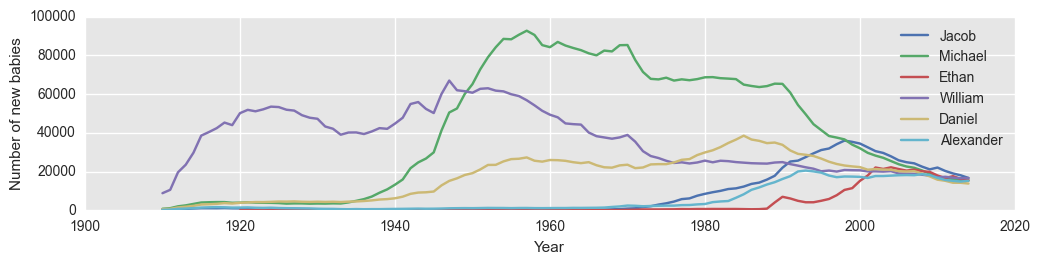

In [32]:
plt.figure(figsize=(12,2.5))

for name in popular:
    plot_names('M',name)
    
plt.legend(popular,loc='best');
plt.xlabel("Year");plt.ylabel("Number of new babies");

The number of new born boys with the top six popular names. 

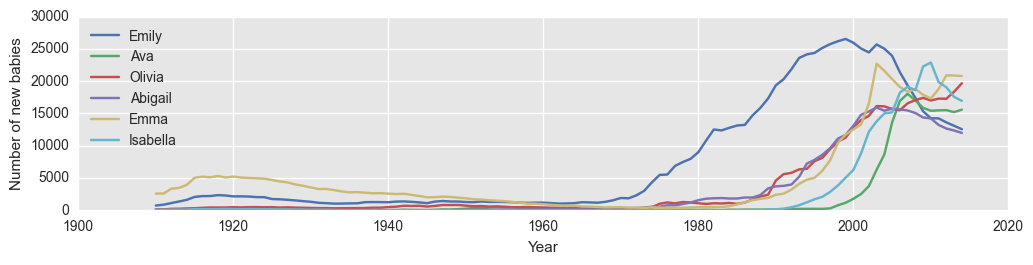

In [33]:
popular = top_tens('F',2005,2014).stack().value_counts().index[:6]
plt.figure(figsize=(12,2.5))

for name in popular:
    plot_names('F',name)
    
plt.legend(popular,loc='best');
plt.xlabel("Year");plt.ylabel("Number of new babies");

The number of new born girls with the top six popular names. 

### Names that are fade

Here we will examine names that are very spike (for some period of time) and started to disappear/disappeared. 

In [34]:
df.groupby(['Gender','Name'])['Count'].sum().head()

Gender  Name  
F       Aadhya    453
        Aadya     300
        Aahana    124
        Aahna       7
        Aaima       5
Name: Count, dtype: int64

In [35]:
totals = df.groupby(['Gender','Name'])['Count'].sum()
totals.head()

Gender  Name  
F       Aadhya    453
        Aadya     300
        Aahana    124
        Aahna       7
        Aaima       5
Name: Count, dtype: int64

In [36]:
def sumsq(x):
    return sum(x**2)

In [37]:
df.groupby(['Gender','Name'])['Count'].sum().head()

Gender  Name  
F       Aadhya    453
        Aadya     300
        Aahana    124
        Aahna       7
        Aaima       5
Name: Count, dtype: int64

In [38]:
spikyness = df.groupby(['Gender','Name'])['Count'].agg(sumsq) / totals**2

In [39]:
spikyness.head()

Gender  Name  
F       Aadhya    0.350292
        Aadya     0.282689
        Aahana    0.158429
        Aahna     1.000000
        Aaima     1.000000
Name: Count, dtype: float64

In [40]:
spiky_common = spikyness[totals > 10000].copy()
spiky_common.sort_values(ascending=False,inplace=True)
spiky_common.head(10)

Gender  Name    
M       Jase        0.222592
        Brantley    0.209014
        Bentley     0.186448
F       Harper      0.172670
        Mila        0.172052
        Aria        0.165665
        Paisley     0.164719
        Miley       0.156682
        Adalyn      0.144704
        Khloe       0.140904
Name: Count, dtype: float64

In [41]:
spiky_common.tail(5)

Gender  Name     
M       Nelson       0.010108
F       Elizabeth    0.010105
M       Joseph       0.010085
        Marshall     0.010041
F       Nina         0.010036
Name: Count, dtype: float64

In [42]:
fads = spiky_common.head(10).index.values

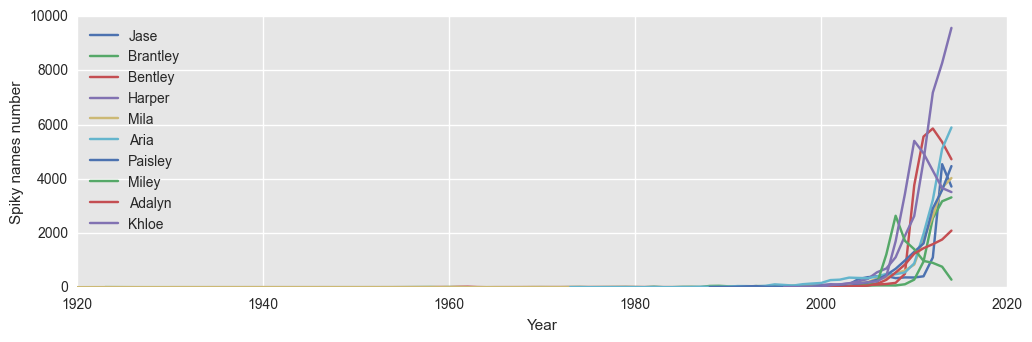

In [43]:
plt.figure(figsize=(12,3.5))

for sex,name in fads:
    plot_names(sex,name)

plt.legend([name for sex,name in fads],loc='upper left');
plt.xlabel("Year");plt.ylabel("Spiky names number");

In [44]:
totals_recent = df[df['Year'] > 2005].groupby(['Gender','Name'])['Count'].sum()

In [45]:
spiky_common = spikyness[(totals > 20000) & (totals_recent < 4000)].copy()
spiky_common.sort_values(ascending=False,inplace=True)
spiky_common.head(10)

Gender  Name    
F       Jaime       0.070854
        Latoya      0.061386
        Debbie      0.060666
        Brittney    0.056179
        Tamika      0.055477
        Chelsey     0.054636
        Debra       0.054525
M       Darrin      0.052385
F       Debora      0.052009
M       Tim         0.050083
Name: Count, dtype: float64

In [46]:
fads = spiky_common.head(6).index.values

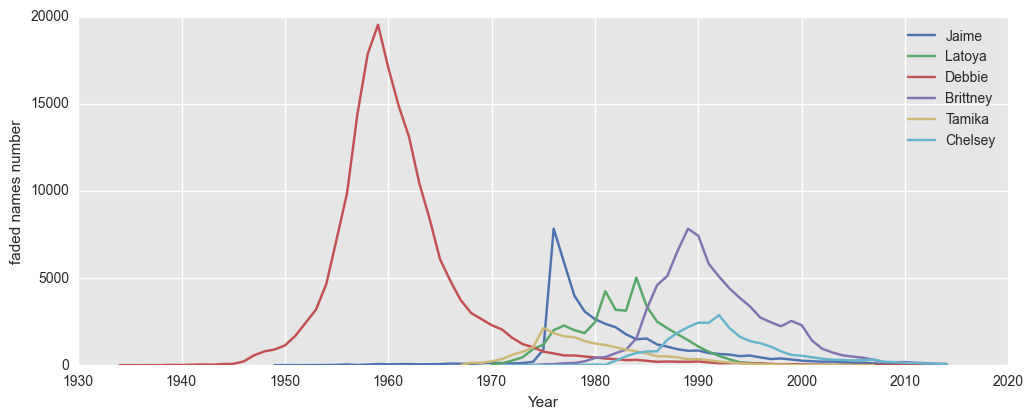

In [47]:
plt.figure(figsize=(12,4.5))

for sex,name in fads:
    plot_names(sex,name)

plt.legend([name for sex,name in fads],loc='best');
plt.xlabel("Year");plt.ylabel("faded names number");

### Unisex names

Here we will explore names that are equally given to either boys or girls. We will find names that are given for both boys and girls and then we will find the ratio of this two number and if it's close one, it is unisex name.

In [48]:
totals = df.groupby(['Gender','Name'])['Count'].sum()

In [49]:
totals_bysex = totals.unstack('Gender')
totals_bysex.head()

Gender,F,M
Name,,
Aaban,NaN,12.0
Aadan,NaN,23.0
Aadarsh,NaN,5.0
Aaden,NaN,3426.0
Aadhav,NaN,6.0


In [50]:
totals_both = totals_bysex.sum(axis = 1)

In [51]:
totals_both.head()

Name
Aaban        12.0
Aadan        23.0
Aadarsh       5.0
Aaden      3426.0
Aadhav        6.0
dtype: float64

In [52]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [53]:
ratio.head()

Name
Aaban     NaN
Aadan     NaN
Aadarsh   NaN
Aaden     NaN
Aadhav    NaN
dtype: float64

In [54]:
unisex = (ratio > 0.75) & (ratio <1.25)

In [55]:
totals_both = totals_both[unisex]
totals_both.sort_values(ascending=False,inplace=True)
totals_both.head(5)

Name
Riley      163232.0
Jackie     161193.0
Kerry       91885.0
Robbie      35562.0
Justice     26422.0
dtype: float64

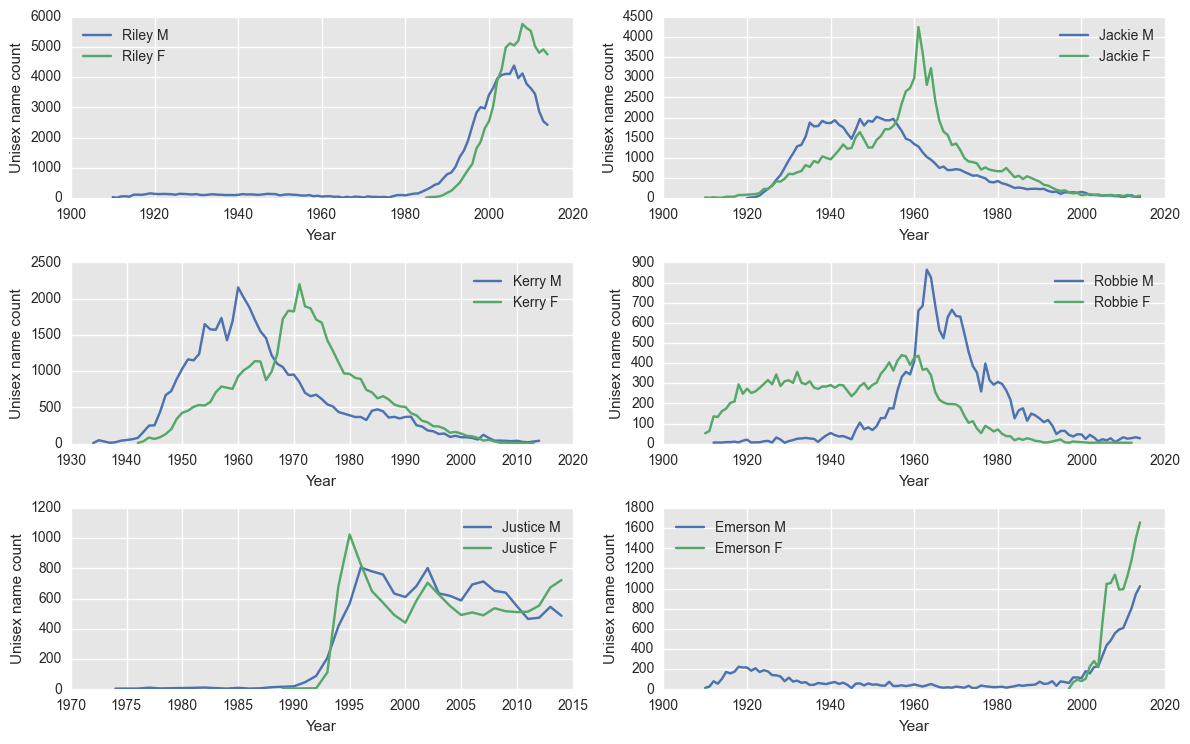

In [56]:
names = totals_both.head(6).index.values
plt.figure(figsize=(12,12))

for i,name in enumerate(names):
    plt.subplot(5,2,i+1)
    
    plot_names('M',name)
    plot_names('F',name)
    
    plt.legend([name + ' M',name + ' F'],loc='best')
    plt.xlabel("Year");plt.ylabel("Unisex name count");
    plt.tight_layout();

### New baby names every year

Here we will look the number of unique new baby name as function of years. We will scale the result by the number of names in that year. 

In [57]:
count=[len(set(list(df[df.Year==i]['Name'].unique())) - set(list(df[df.Year <i]['Name'].unique())))/len(df[df.Year==i]) for i in sorted(df.Year.unique())]
year=[i for i in sorted(df.Year.unique())]

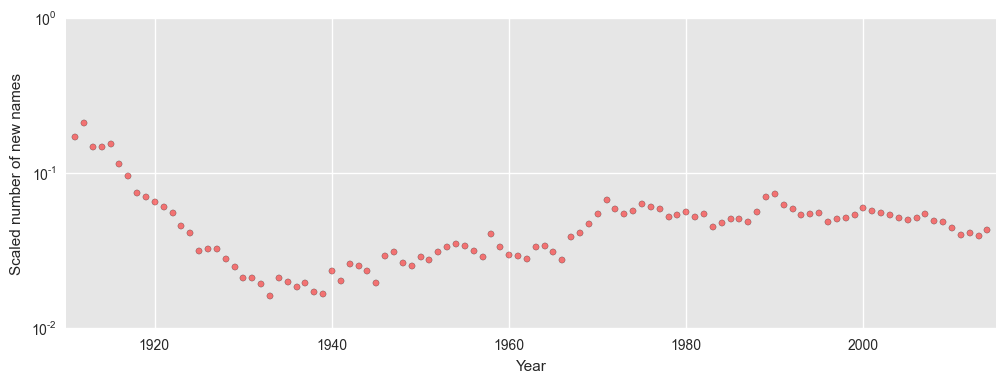

In [58]:
plt.figure(figsize=(12,4))
plt.scatter(year[1:], count[1:], c='red', alpha=0.5,s=20)
plt.xlabel("Year");plt.ylabel("Scaled number of new names")
plt.yscale("log")
plt.ylim(1*10**-2,10**0);plt.xlim(1910, 2015);

From this plot, we can see that the number of new babies assigned to are decreasing and reach to the lowest level around 1940 and then recover back. This is interesting and the cause for this lowest might due to some society issue. For example, around 1940 was world war II and where the total number of baby is lower around that year. The other reason might be due to depression as the result of the war, parents might not have time to find new name. The is slight decrease in new babies’ name after 2000. It’s a curious question to predict this trend will keep decreasing or increasing.

### Predicting number of new babies name with ARIMA model

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model that is used for time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. 

Let us first define a dataframe for year as index and scaled count as valuse.

In [59]:
Arima=pd.DataFrame(year[1:])
Arima.columns=['year']
Arima['scaled_count']=count[1:]
Arima.index=Arima['year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))
Arima.drop(['year'],axis=1, inplace=True)
Arima.head()

,scaled_count
year,
1911-01-01,0.172527
1912-01-01,0.211789
1913-01-01,0.148887
1914-01-01,0.148538
1915-01-01,0.154387


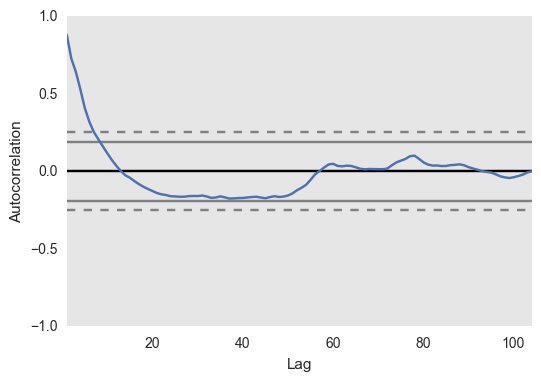

In [60]:
autocorrelation_plot(Arima.values);

From the autocorelation, we can see that there is a positive correlation with the first before around 15 lags that is perhaps significant for the first 10 lags.

A good starting point for the AR parameter of the model may be $p=10$. lets start to build the ARIMA model now with $p=10, q=4, d=0$. However, the right way to build ARIMA model with this parameters is to tune tehm that minimize the error model.

In [61]:
model = pf.ARIMA(data=Arima,ar=10,ma=4,integ=0,target='scaled_count')

In [62]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(10,0,4)                                                                                      
======================================================= ==================================================
Dependent Variable: scaled_count                        Method: MLE                                       
Start Date: 1921-01-01 00:00:00                         Log Likelihood: 385.4937                          
End Date: 2014-01-01 00:00:00                           AIC: -738.9873                                    
Number of observations: 94                              BIC: -698.2946                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0031     0.0018     1.7631   0.0779   (-0.0003 | 0.0066)       
AR(1)                                

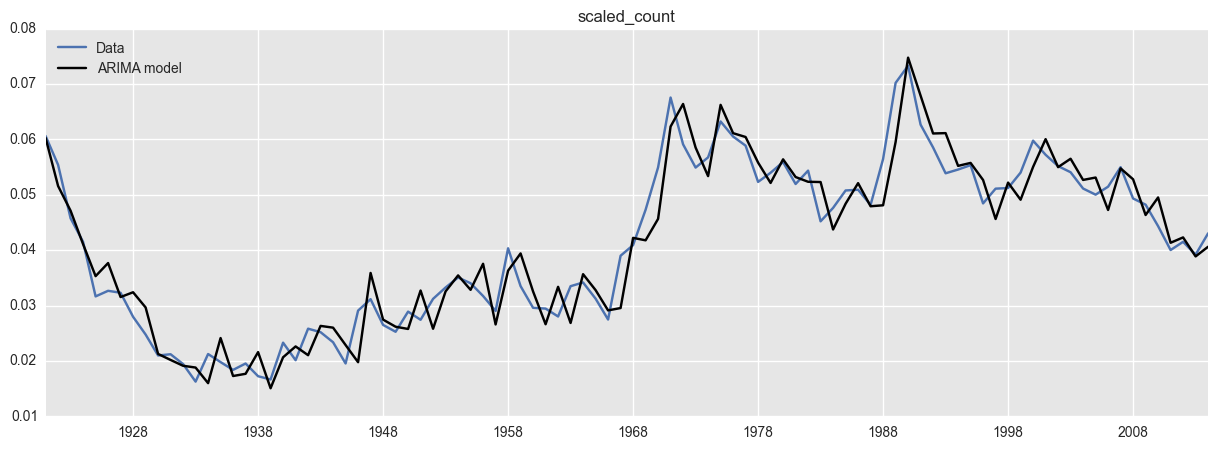

In [63]:
model.plot_fit(figsize=(15,5))

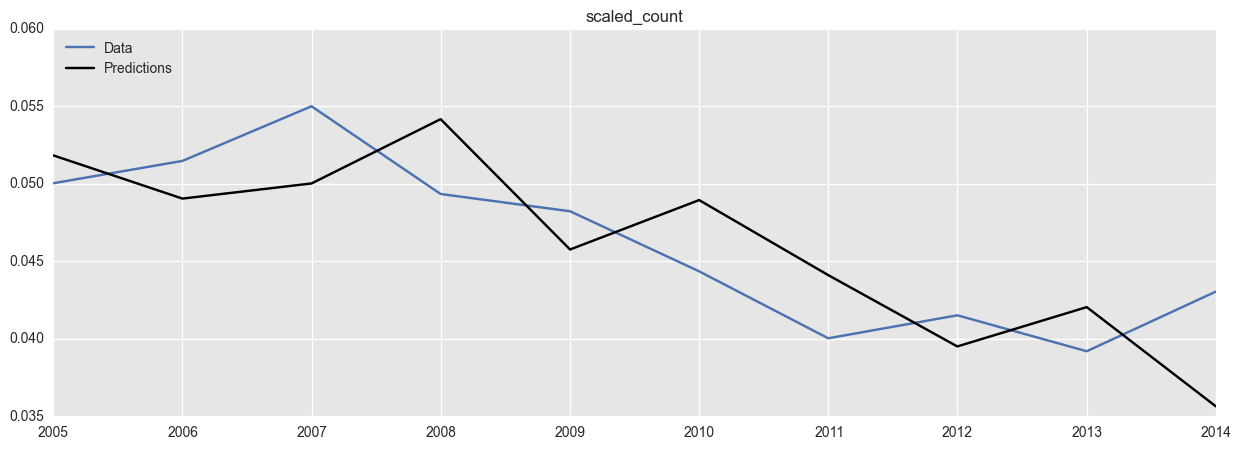

In [64]:
model.plot_predict_is(10,figsize=(15,5))

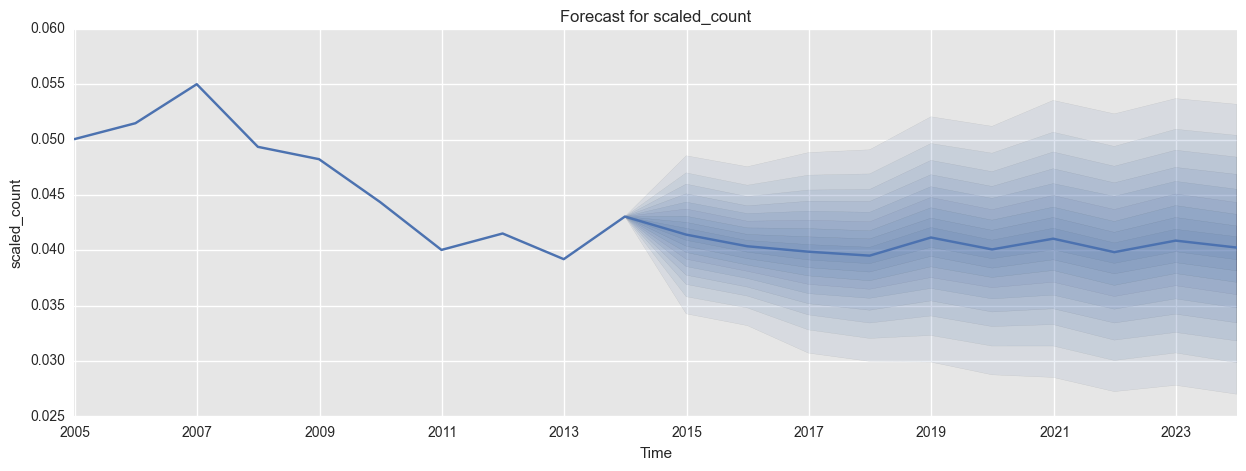

In [65]:
model.plot_predict(h=10,past_values=10,figsize=(15,5))

It looks like the new baby names added  every years might still going down as we see from the prediction. 